## Import Library

In [1]:
#import keras library and packages

import os
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator

## Load & Preprocessing dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Prepare train data 
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

#Prepare test data
test_datagen = ImageDataGenerator(rescale = 1./255)

In [5]:
#Training dataset directory
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/SKRIPSI/DATA GAMBAR/Gender/gender/train',
                                                 target_size = (64,64),
                                                 batch_size = 16,
                                                 class_mode = 'binary')
#testing dataset directory
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/SKRIPSI/DATA GAMBAR/Gender/gender/test',
                                               target_size = (64,64),
                                               batch_size = 16,
                                               class_mode = 'binary')

Found 3491 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


### Convolution Neural Network

In [ ]:
#initialize the CNN
classifier = Sequential()

# Convolution 1
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Pooling 1
classifier.add(MaxPooling2D(pool_size = (2, 2))) #pool size 2x2

# Convolution 2
classifier.add(Conv2D(16, (3, 3), activation = 'relu'))

# Pooling 2
classifier.add(MaxPooling2D(pool_size = (2, 2))) #pool size 2x2

# Flattening
classifier.add(Flatten())

# Full connection
classifier.add(Dense(units = 128, activation = 'relu')) #Dense of hidden layer (128)
classifier.add(Dense(units = 1, activation = 'sigmoid')) #Output

#Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
#Fit that dataset to the classifier
history = classifier.fit_generator(training_set, epochs = 25, validation_data = test_set)

<ipython-input-5-fd6b623ef5bb>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = classifier.fit_generator(training_set,


Epoch 1/25
219/219 [==============================] - 421s 2s/step - loss: 0.5434 - accuracy: 0.7101 - val_loss: 0.3093 - val_accuracy: 0.8750
Epoch 2/25
219/219 [==============================] - 25s 115ms/step - loss: 0.3497 - accuracy: 0.8545 - val_loss: 0.3169 - val_accuracy: 0.9000
Epoch 3/25
219/219 [==============================] - 27s 122ms/step - loss: 0.3367 - accuracy: 0.8628 - val_loss: 0.2142 - val_accuracy: 0.9150
Epoch 4/25
219/219 [==============================] - 25s 113ms/step - loss: 0.2832 - accuracy: 0.8914 - val_loss: 0.2200 - val_accuracy: 0.9200
Epoch 5/25
219/219 [==============================] - 25s 113ms/step - loss: 0.2733 - accuracy: 0.8940 - val_loss: 0.1933 - val_accuracy: 0.9250
Epoch 6/25
219/219 [==============================] - 25s 114ms/step - loss: 0.2431 - accuracy: 0.9043 - val_loss: 0.1672 - val_accuracy: 0.9400
Epoch 7/25
219/219 [==============================] - 26s 119ms/step - loss: 0.2377 - accuracy: 0.9040 - val_loss: 0.1711 - val_accu

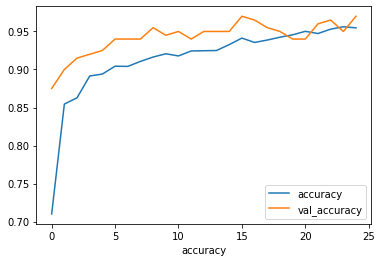

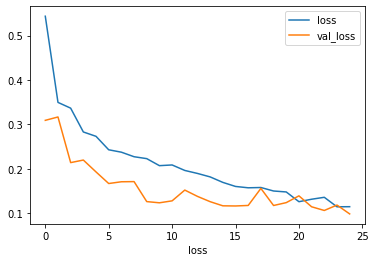

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('epoch')
  plt.xlabel(string)
  plt.legend([string, "val_"+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
test_set.class_indices

{'female': 0, 'male': 1}

### Evaluasi model


In [ ]:
classifier.evaluate(test_set)

13/13 [==============================] - 1s 50ms/step - loss: 0.0988 - accuracy: 0.9700


[0.09883508831262589, 0.9700000286102295]

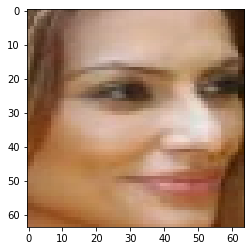

1/1 [==============================] - 0s 99ms/step
Female


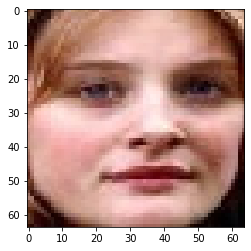

1/1 [==============================] - 0s 21ms/step
Male


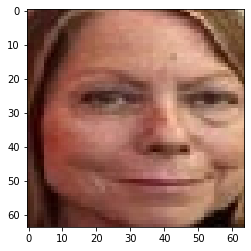

1/1 [==============================] - 0s 19ms/step
Female


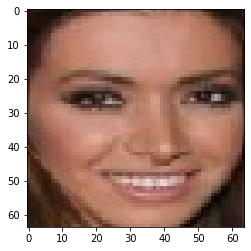

1/1 [==============================] - 0s 18ms/step
Female


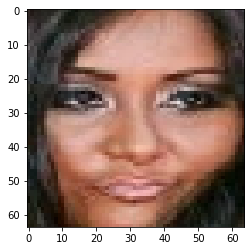

1/1 [==============================] - 0s 18ms/step
Female


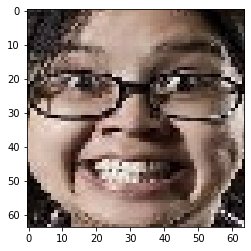

1/1 [==============================] - 0s 17ms/step
Male


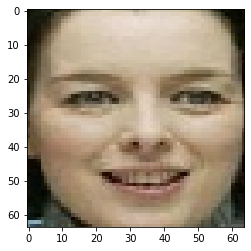

1/1 [==============================] - 0s 23ms/step
Female


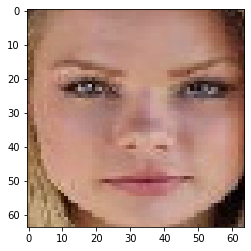

1/1 [==============================] - 0s 18ms/step
Female


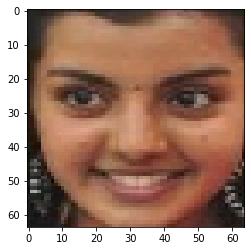

1/1 [==============================] - 0s 17ms/step
Male


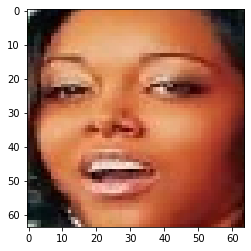

1/1 [==============================] - 0s 17ms/step
Female


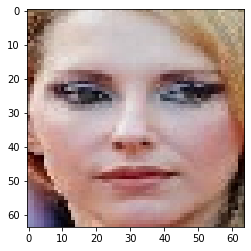

1/1 [==============================] - 0s 18ms/step
Female


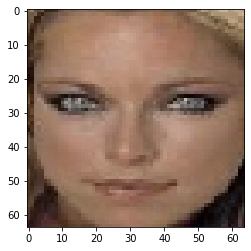

1/1 [==============================] - 0s 17ms/step
Female


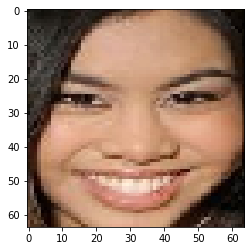

1/1 [==============================] - 0s 18ms/step
Female


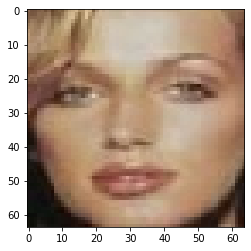

1/1 [==============================] - 0s 17ms/step
Female


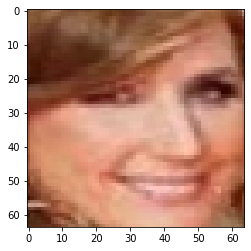

1/1 [==============================] - 0s 18ms/step
Female


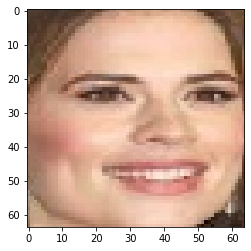

1/1 [==============================] - 0s 27ms/step
Female


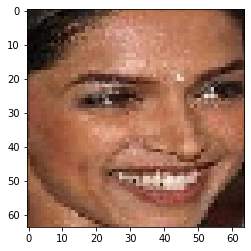

1/1 [==============================] - 0s 18ms/step
Female


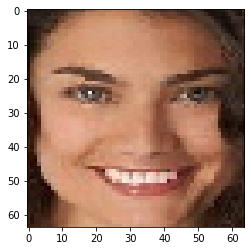

1/1 [==============================] - 0s 18ms/step
Female


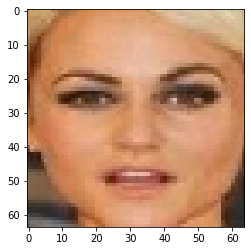

1/1 [==============================] - 0s 20ms/step
Female


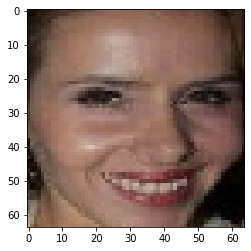

1/1 [==============================] - 0s 18ms/step
Female


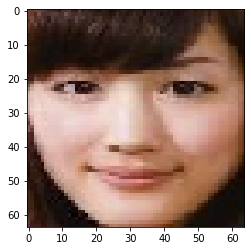

1/1 [==============================] - 0s 20ms/step
Female


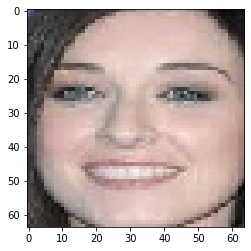

1/1 [==============================] - 0s 19ms/step
Female


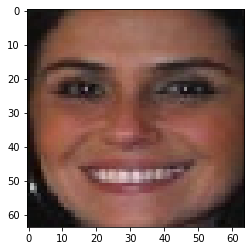

1/1 [==============================] - 0s 21ms/step
Female


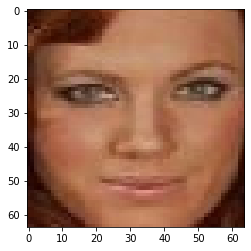

1/1 [==============================] - 0s 21ms/step
Female


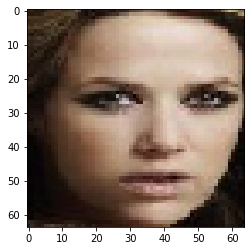

1/1 [==============================] - 0s 20ms/step
Male


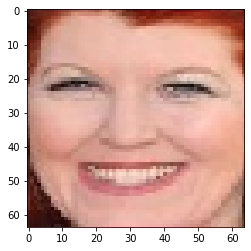

1/1 [==============================] - 0s 18ms/step
Female


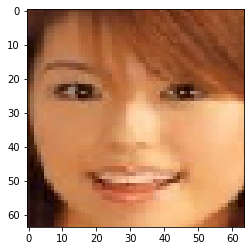

1/1 [==============================] - 0s 18ms/step
Female


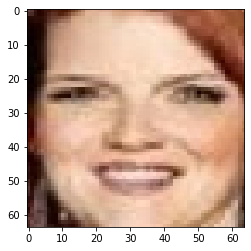

1/1 [==============================] - 0s 23ms/step
Female


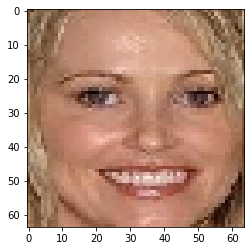

1/1 [==============================] - 0s 19ms/step
Female


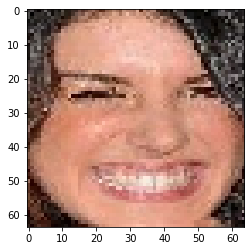

1/1 [==============================] - 0s 18ms/step
Female


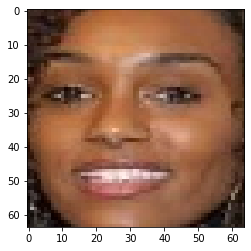

1/1 [==============================] - 0s 19ms/step
Female


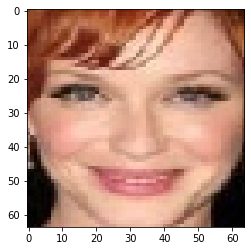

1/1 [==============================] - 0s 19ms/step
Female


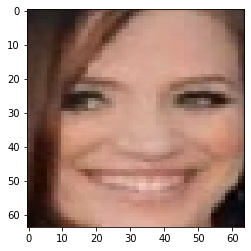

1/1 [==============================] - 0s 17ms/step
Female


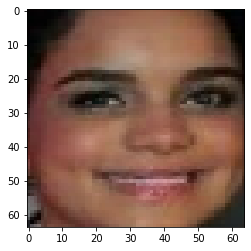

1/1 [==============================] - 0s 17ms/step
Female


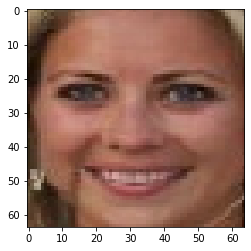

1/1 [==============================] - 0s 18ms/step
Female


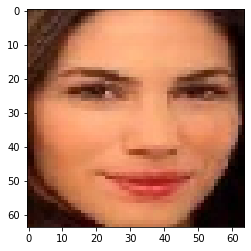

1/1 [==============================] - 0s 19ms/step
Female


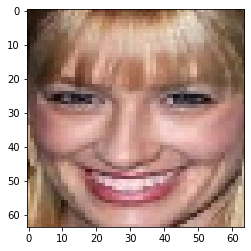

1/1 [==============================] - 0s 17ms/step
Female


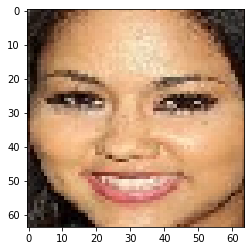

1/1 [==============================] - 0s 18ms/step
Female


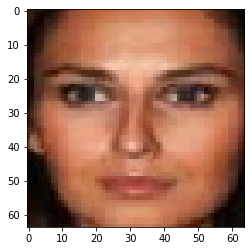

1/1 [==============================] - 0s 17ms/step
Male


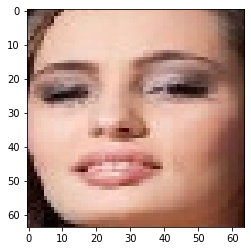

1/1 [==============================] - 0s 17ms/step
Female


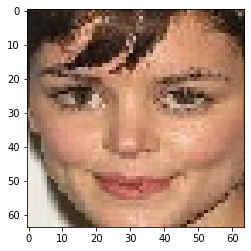

1/1 [==============================] - 0s 22ms/step
Male


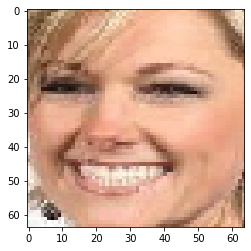

1/1 [==============================] - 0s 19ms/step
Female


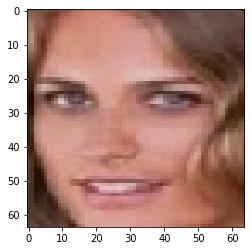

1/1 [==============================] - 0s 19ms/step
Female


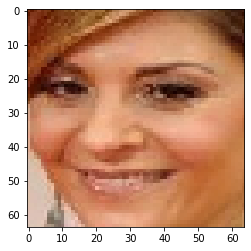

1/1 [==============================] - 0s 18ms/step
Female


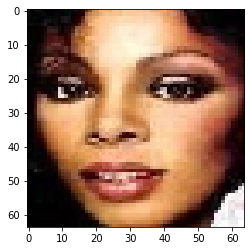

1/1 [==============================] - 0s 19ms/step
Female


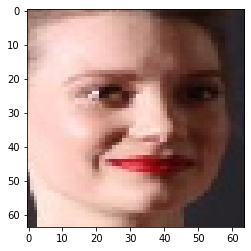

1/1 [==============================] - 0s 19ms/step


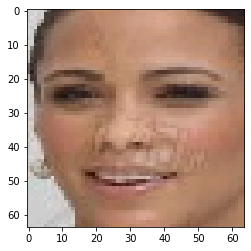

1/1 [==============================] - 0s 20ms/step
Female


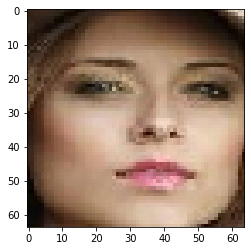

1/1 [==============================] - 0s 18ms/step
Female


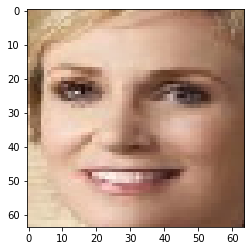

1/1 [==============================] - 0s 18ms/step
Female


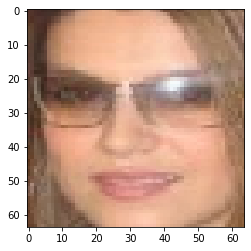

1/1 [==============================] - 0s 29ms/step


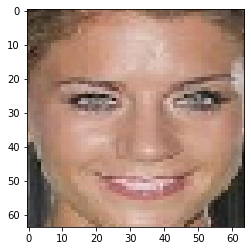

1/1 [==============================] - 0s 30ms/step
Female


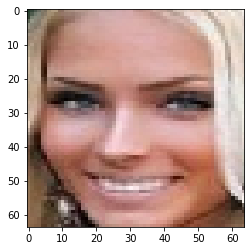

1/1 [==============================] - 0s 19ms/step
Female


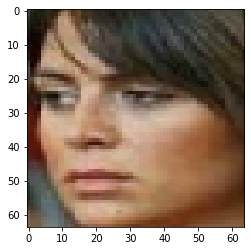

1/1 [==============================] - 0s 18ms/step
Female


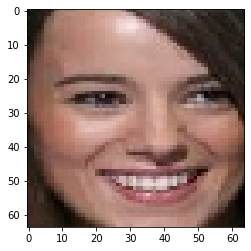

1/1 [==============================] - 0s 25ms/step
Female


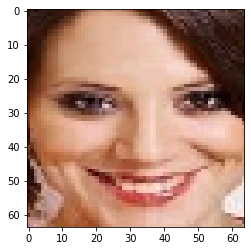

1/1 [==============================] - 0s 20ms/step
Female


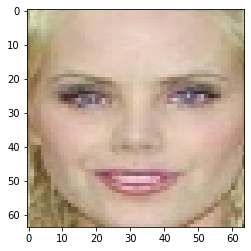

1/1 [==============================] - 0s 24ms/step
Female


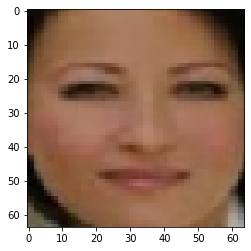

1/1 [==============================] - 0s 19ms/step
Female


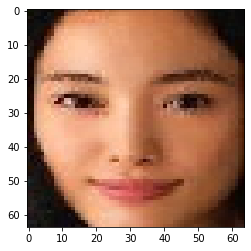

1/1 [==============================] - 0s 19ms/step
Female


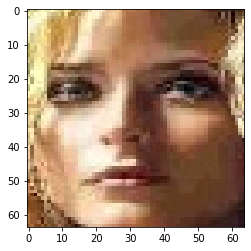

1/1 [==============================] - 0s 19ms/step
Female


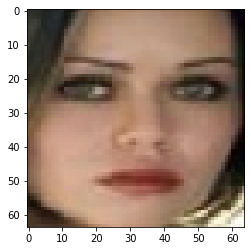

1/1 [==============================] - 0s 20ms/step
Female


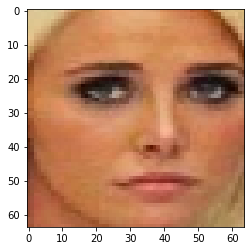

1/1 [==============================] - 0s 24ms/step
Female


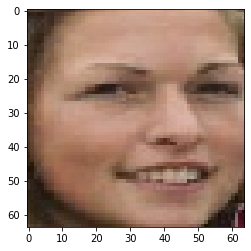

1/1 [==============================] - 0s 27ms/step
Female


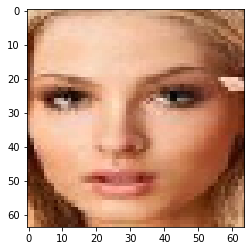

1/1 [==============================] - 0s 23ms/step
Female


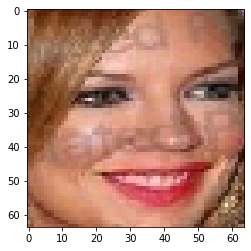

1/1 [==============================] - 0s 19ms/step
Female


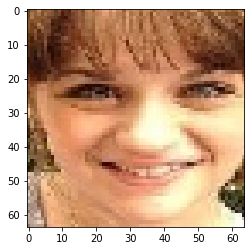

1/1 [==============================] - 0s 23ms/step
Female


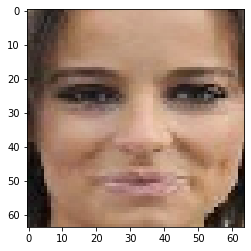

1/1 [==============================] - 0s 23ms/step
Female


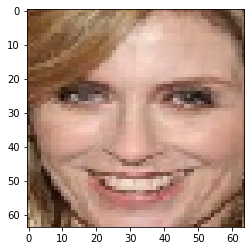

1/1 [==============================] - 0s 25ms/step
Female


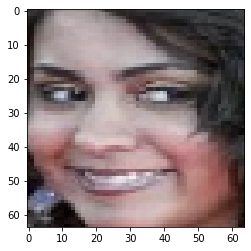

1/1 [==============================] - 0s 29ms/step
Female


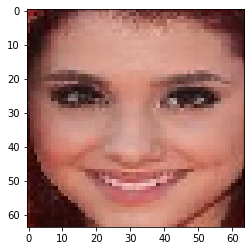

1/1 [==============================] - 0s 22ms/step
Female


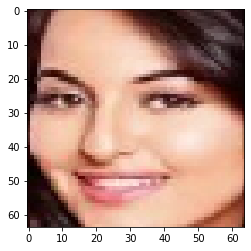

1/1 [==============================] - 0s 22ms/step
Female


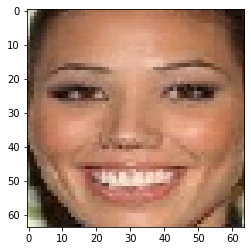

1/1 [==============================] - 0s 27ms/step
Female


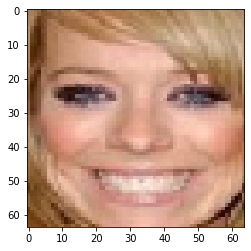

1/1 [==============================] - 0s 22ms/step
Female


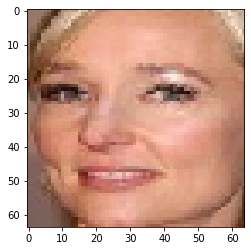

1/1 [==============================] - 0s 22ms/step
Female


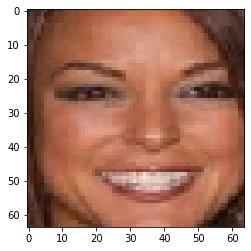

1/1 [==============================] - 0s 26ms/step
Female


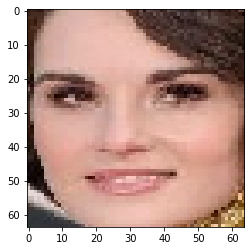

1/1 [==============================] - 0s 23ms/step
Female


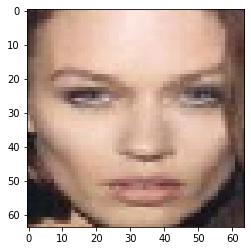

1/1 [==============================] - 0s 23ms/step
Female


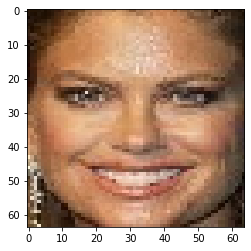

1/1 [==============================] - 0s 26ms/step
Female


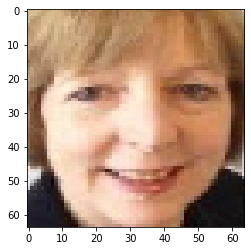

1/1 [==============================] - 0s 21ms/step
Female


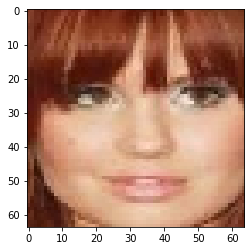

1/1 [==============================] - 0s 27ms/step
Female


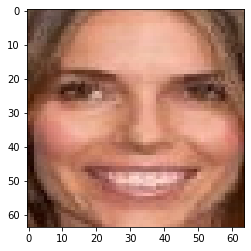

1/1 [==============================] - 0s 26ms/step
Female


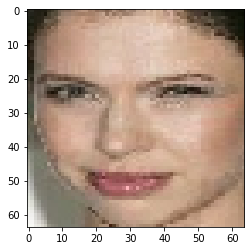

1/1 [==============================] - 0s 25ms/step
Male


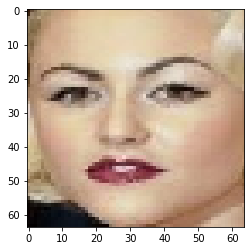

1/1 [==============================] - 0s 34ms/step
Female


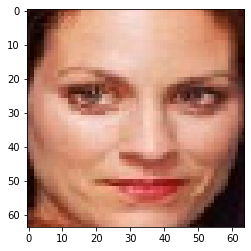

1/1 [==============================] - 0s 33ms/step
Female


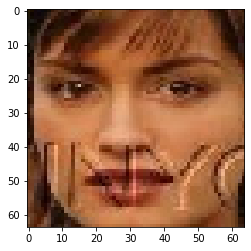

1/1 [==============================] - 0s 26ms/step
Male


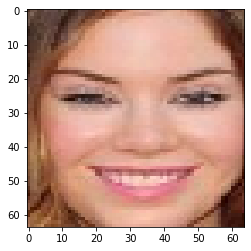

1/1 [==============================] - 0s 24ms/step
Female


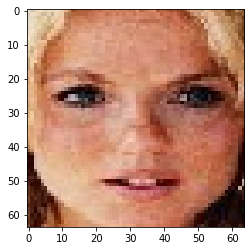

1/1 [==============================] - 0s 23ms/step
Female


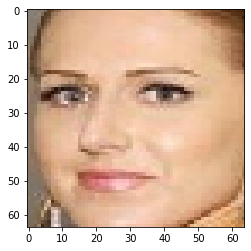

1/1 [==============================] - 0s 25ms/step
Female


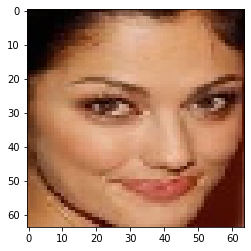

1/1 [==============================] - 0s 26ms/step
Female


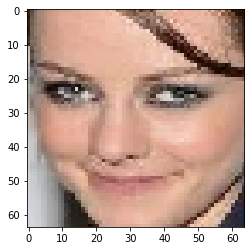

1/1 [==============================] - 0s 25ms/step
Male


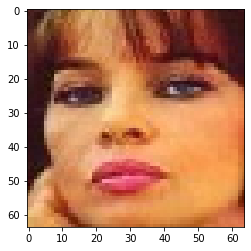

1/1 [==============================] - 0s 36ms/step
Female


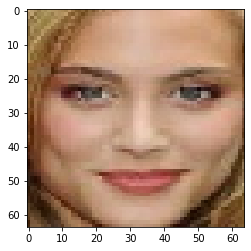

1/1 [==============================] - 0s 34ms/step
Female


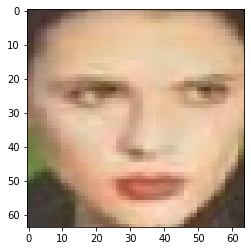

1/1 [==============================] - 0s 24ms/step
Male


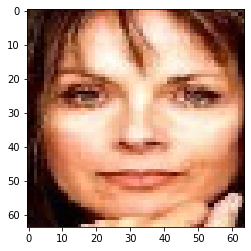

1/1 [==============================] - 0s 26ms/step
Female


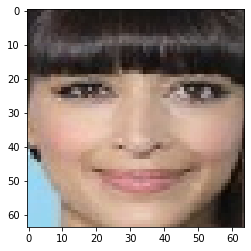

1/1 [==============================] - 0s 25ms/step
Male


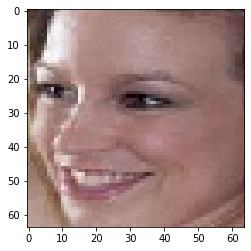

1/1 [==============================] - 0s 22ms/step
Female


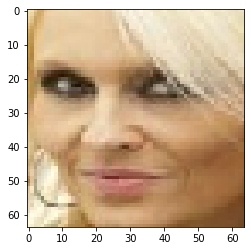

1/1 [==============================] - 0s 27ms/step
Male


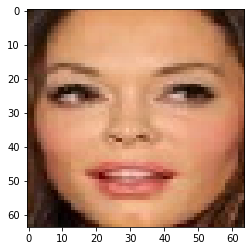

1/1 [==============================] - 0s 29ms/step
Female


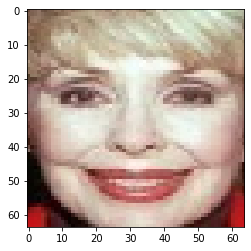

1/1 [==============================] - 0s 18ms/step
Female


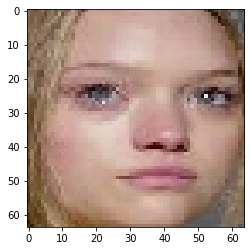

1/1 [==============================] - 0s 29ms/step
Male


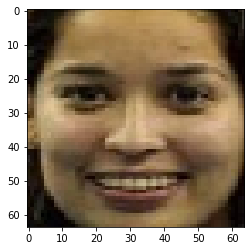

1/1 [==============================] - 0s 27ms/step
Female


In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from keras_preprocessing import image

dir_path = '/content/drive/My Drive/SKRIPSI/DATA GAMBAR/Gender/gender/test/female'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+i, target_size=(64,64,3))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis =0)
    images = np.vstack([X])
    val = classifier.predict(images)
    if val == 0:
        print("Female")
    elif val == 1:
        print("Male")   